In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pyodbc 
import warnings
warnings.filterwarnings('ignore')
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DYIAA\SQLEXPRESS;'
    'DATABASE=EDA_project;'
    'Trusted_Connection=yes;'
)

In [3]:
conn=pyodbc.connect(conn_str)


In [4]:
query='select * from dbo.shopping_trends'
df=pd.read_sql(query,conn)
df.sample(5)

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
3876,3877,60,Female,Shoes,Footwear,85,Wisconsin,S,Cyan,Fall,2.6,No,Bank Transfer,2-Day Shipping,No,No,7,Cash,Annually
411,412,59,Male,Jeans,Clothing,29,Michigan,M,Indigo,Summer,2.8,Yes,Cash,Express,Yes,Yes,15,PayPal,Annually
394,395,43,Male,Scarf,Accessories,29,North Dakota,M,Beige,Spring,4.8,Yes,PayPal,Store Pickup,Yes,Yes,7,Debit Card,Bi-Weekly
2072,2073,39,Male,Backpack,Accessories,66,Massachusetts,M,Beige,Winter,3.9,No,Credit Card,Next Day Air,No,No,22,Bank Transfer,Weekly
3023,3024,50,Female,Backpack,Accessories,31,Indiana,M,Brown,Summer,2.9,No,PayPal,Express,No,No,4,PayPal,Quarterly


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [8]:
fig=px.histogram(df,x='Gender',title='Age Distribution',color="Gender")
fig.show()

In [9]:
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [10]:
fig=px.histogram(df,x='Category',title='Category Items Distribution',color='Category')
fig.show()

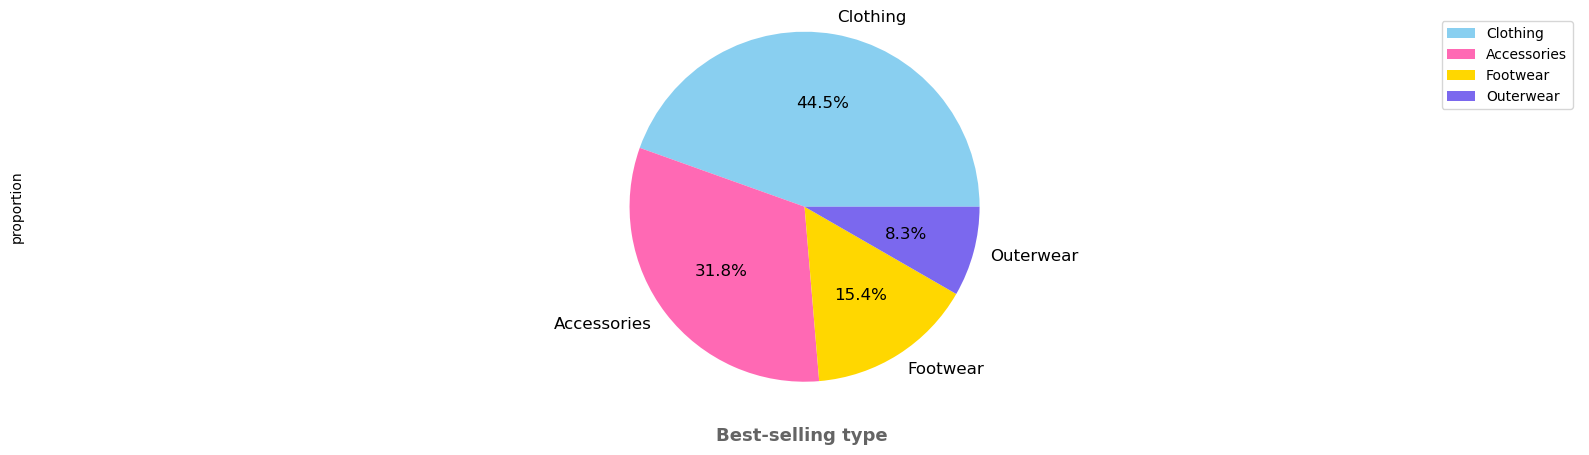

In [11]:
plt.figure(figsize=(20,5))
Category_counts=df['Category'].value_counts('Category')
Category_counts.plot(kind='pie',colors=colors,autopct='%.1f%%',fontsize=12)
plt.xlabel('Best-selling type ',weight='bold',color='#646464',fontsize=13,labelpad=20)
plt.axis('equal')
plt.legend(labels=Category_counts.index,loc='best')

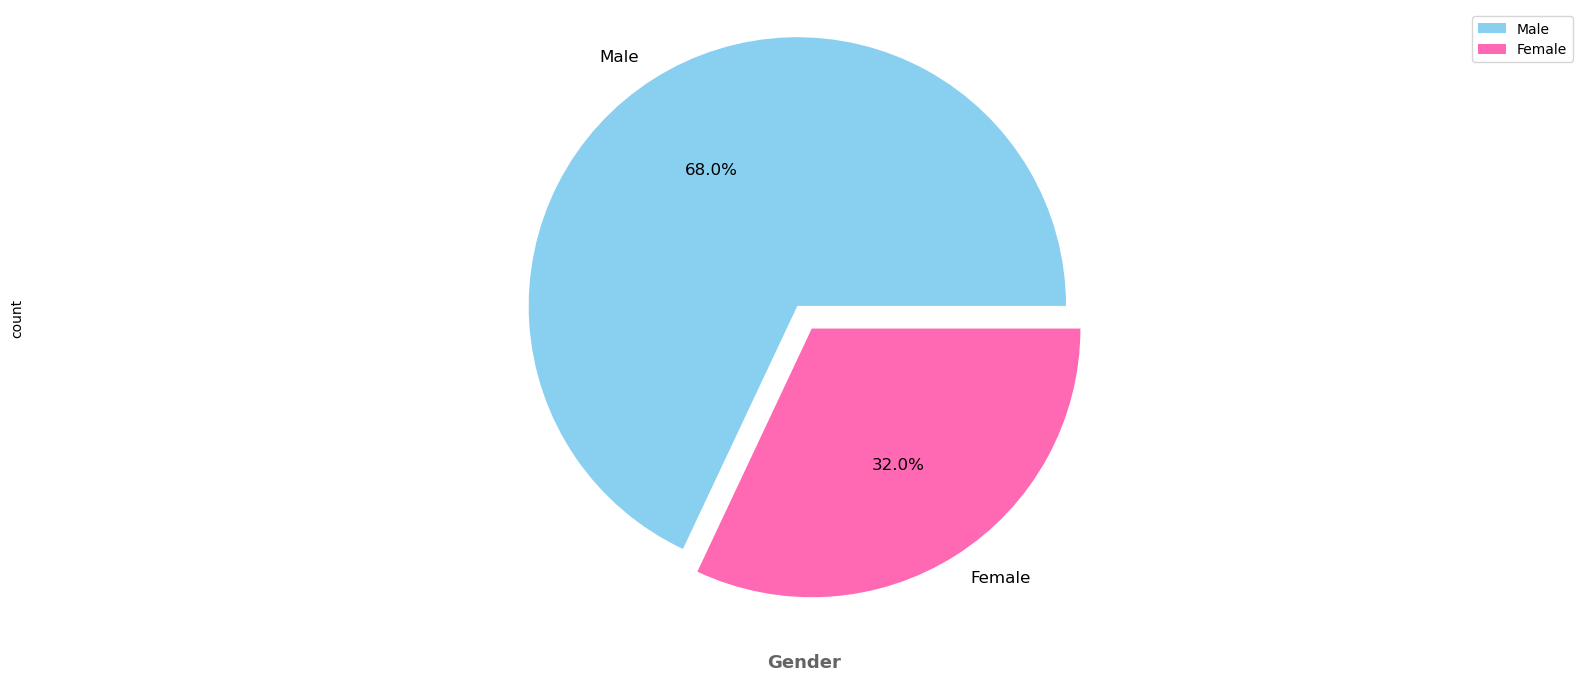

In [13]:
plt.figure(figsize=(20,8))
counts=df['Gender'].value_counts()
counts.plot(kind='pie',fontsize=12,colors=colors,explode=(0,0.1),autopct='%1.1f%%')
plt.xlabel("Gender",weight='bold',color='#646464',fontsize=13,labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index,loc='best')

In [14]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


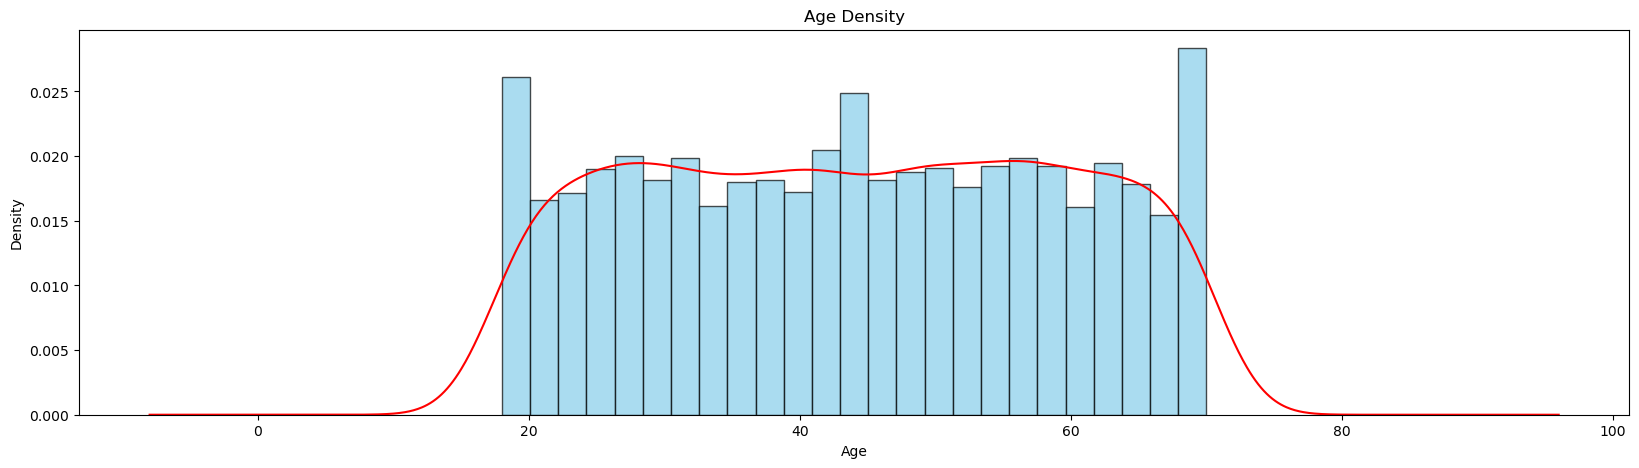

In [15]:
fig,ax=plt.subplots(figsize=(20,5))
ax.hist(df['Age'],bins=25,edgecolor='black',color='skyblue',alpha=.7,density=True)
df['Age'].plot(kind='kde',color='red',ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.set_title('Age Density')
fig.show()

In [16]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [17]:
df.groupby('Location')['Purchase_Amount_USD'].mean()

Location
Alabama           59.112360
Alaska            67.597222
Arizona           66.553846
Arkansas          61.113924
California        59.000000
Colorado          56.293333
Connecticut       54.179487
Delaware          55.325581
Florida           55.852941
Georgia           58.797468
Hawaii            57.723077
Idaho             60.075269
Illinois          61.054348
Indiana           58.924051
Iowa              60.884058
Kansas            54.555556
Kentucky          55.721519
Louisiana         57.714286
Maine             56.987013
Maryland          55.755814
Massachusetts     60.888889
Michigan          62.095890
Minnesota         56.556818
Mississippi       61.037500
Missouri          57.913580
Montana           60.250000
Nebraska          59.448276
Nevada            63.379310
New Hampshire     59.422535
New Jersey        56.746269
New Mexico        61.901235
New York          60.425287
North Carolina    60.794872
North Dakota      62.891566
Ohio              60.376623
Oklahoma   

In [18]:
avg_sales=df.groupby('Location')['Purchase_Amount_USD'].mean()
df['avg_sales']=df['Location'].map(avg_sales)
df[["Location",'avg_sales']]

,Location,avg_sales
0,Kentucky,55.721519
1,Maine,56.987013
2,Massachusetts,60.888889
3,Rhode Island,61.444444
4,Oregon,57.337838
...,...,...
3895,Virginia,62.883117
3896,Iowa,60.884058
3897,New Jersey,56.746269
3898,Minnesota,56.556818


In [19]:
country_Frequency= df['Location'].value_counts().reset_index()
country_Frequency.columns=['Location','Count']


fig=px.histogram(country_Frequency,x='Location',y='Count',title="Number of purchases per country ",color='Location')
fig.show()

In [20]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,avg_sales
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,55.721519
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,56.987013
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,60.888889
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,61.444444
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,57.337838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,62.883117
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,60.884058
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,56.746269
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,56.556818


In [21]:
df['Item_Purchased'].value_counts()

Item_Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

In [22]:
Item_Purchased= df['Item_Purchased'].value_counts().reset_index()
Item_Purchased.columns=['Item_Purchased','Count']


fig=px.histogram(Item_Purchased,x='Item_Purchased',y='Count',title="Number of purchases per Item ",color='Item_Purchased')
fig.show()

In [23]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,avg_sales
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,55.721519
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,56.987013
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,60.888889
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,61.444444
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,57.337838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,62.883117
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,60.884058
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,56.746269
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,56.556818


In [24]:
Preferred_Payment_Method=df['Preferred_Payment_Method'].value_counts().reset_index()
Preferred_Payment_Method.columns=['Preferred_Payment_Method','count']
fig=px.histogram(Preferred_Payment_Method,x='Preferred_Payment_Method',y='count',title='Prefrerred Payment Method',color='Preferred_Payment_Method')
fig.show()

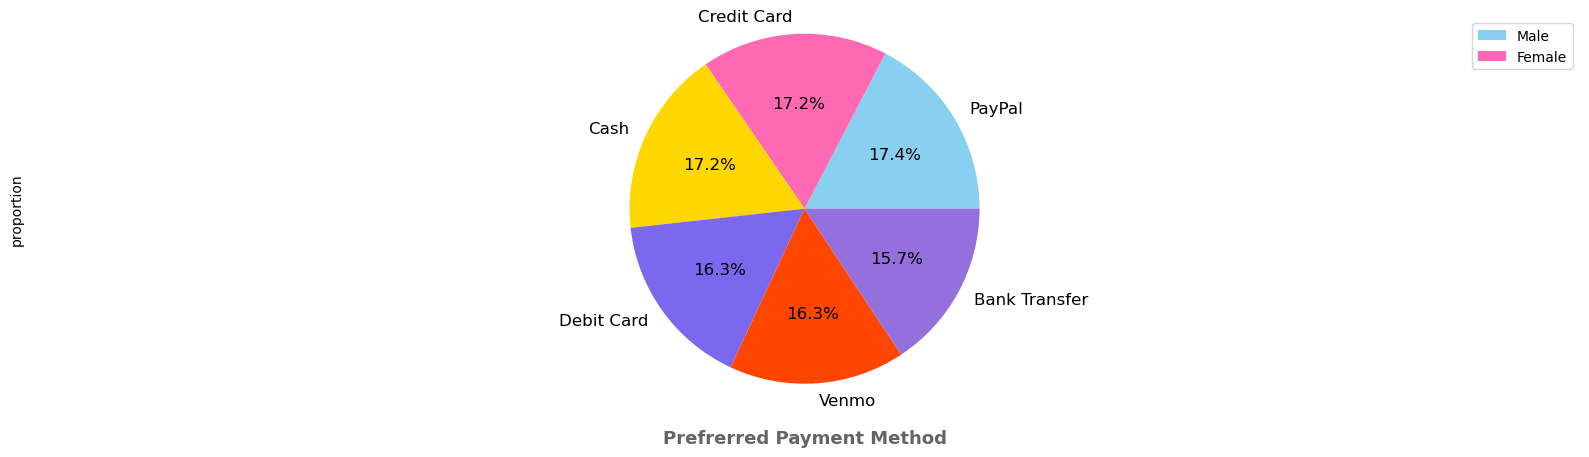

In [25]:
plt.figure(figsize=(20,5))
Preferred_Payment_Method=df['Preferred_Payment_Method'].value_counts('Preferred_Payment_Method')
Preferred_Payment_Method.plot(kind='pie',colors=colors,autopct='%.1f%%',fontsize=12)
plt.xlabel('Prefrerred Payment Method',weight='bold',color='#646464',fontsize=13,labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index,loc='best')

In [26]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases', 'avg_sales'],
      dtype='object')

 ## What is Average Age of Customers?

In [27]:
Average_Age=df['Age'].mean()
print(f'The Average Age of Customers is : {Average_Age}')


The Average Age of Customers is : 44.06846153846154


## What is common item purchased ?

In [28]:
common_item=df['Item_Purchased'].mode()[0]
print(f'The most common Item Purched is : {common_item}')

The most common Item Purched is : Blouse


## What is Common Categories purchased?

In [29]:
common_category=df.groupby('Category')['Item_Purchased'].count()
print('Common Categories purchased is :')
print(common_category)
print('-'*50)
most_category=common_category.idxmax()
print('Most Category is : ')
print(most_category)

Common Categories purchased is :
Category
Accessories    1240
Clothing       1737
Footwear        599
Outerwear       324
Name: Item_Purchased, dtype: int64
--------------------------------------------------
Most Category is : 
Clothing


In [45]:
df

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases,avg_sales
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,55.721519
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,56.987013
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,60.888889
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,61.444444
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,57.337838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly,62.883117
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,60.884058
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly,56.746269
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly,56.556818


## Most Payment Method 

In [44]:
Preferred_Payment_Method=df['Preferred_Payment_Method'].value_counts()
most_payment_method=Preferred_Payment_Method.idxmax()
print(' Most Payment Method is : ',most_payment_method)


 Most Payment Method is :  PayPal


In [ ]:
df['Review_Rating'].max()

5.0

## Most Shipping Type with high rating



In [43]:
common_Shipping_Type=df[df['Review_Rating']>=4]['Shipping_Type'].mode()[0]
print('Most Shipping Type Rating : ',common_Shipping_Type)

Most Shipping Type Rating :  Standard


## What is the most common season for purchases ?

In [46]:
common_season=df['Season'].mode()[0]
print('Most Commons Season for Purches Is :',common_season)

Most Commons Season for Purches Is : Spring


## What is Gender   Have Most Average sales?

In [65]:
most_gender_sales=df.groupby('Gender')['avg_sales'].sum()


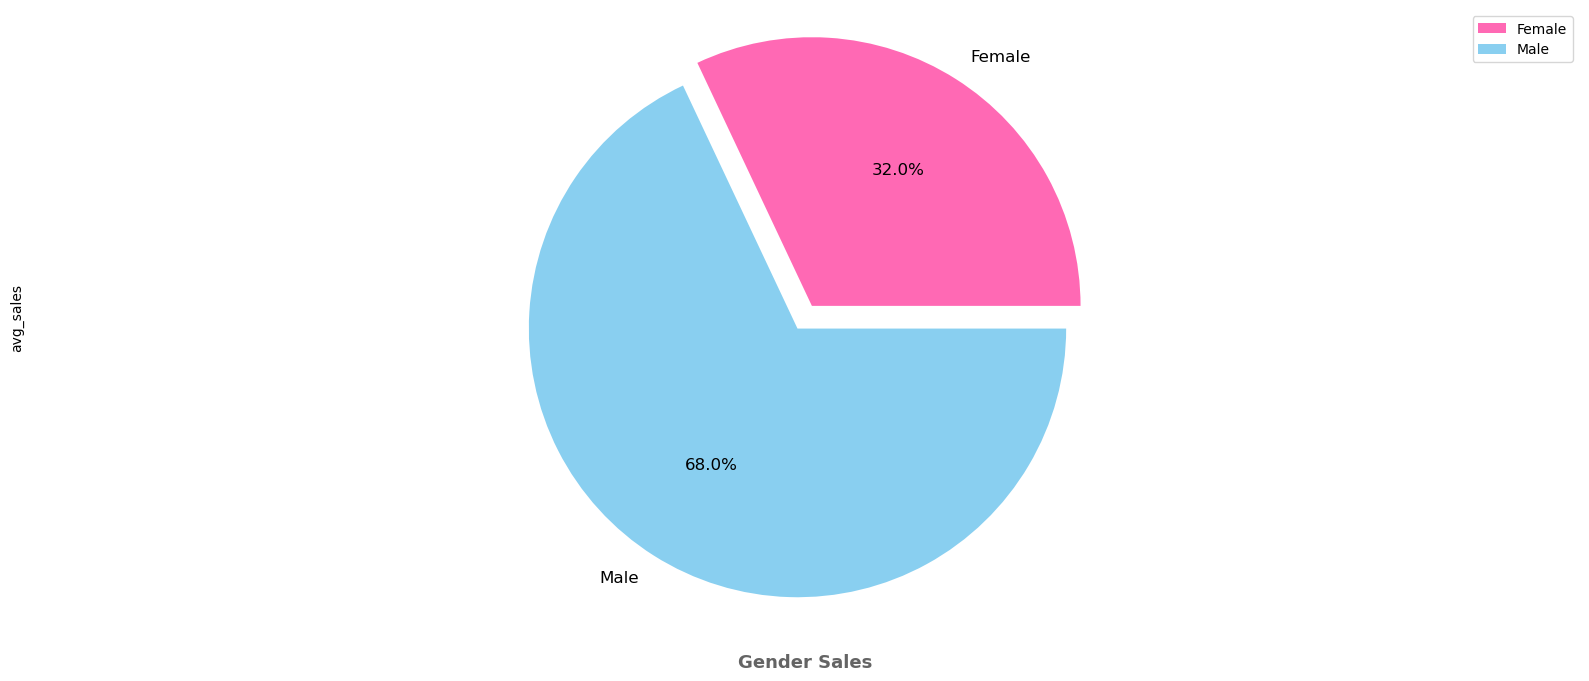

In [66]:
plt.figure(figsize=(20,8))
most_gender_sales.plot(kind='pie',fontsize=12,colors=[ "#FF69B4","#89CFF0" ],explode=(0,0.1),autopct='%1.1f%%')
plt.xlabel("Gender Sales",weight='bold',color='#646464',fontsize=13,labelpad=20)
plt.axis('equal')
plt.legend(labels=most_gender_sales.index,loc='best')
plt.show()